I want to recreate overfitting in as shown from the textbook

In [19]:
from keras import models
from keras import layers
def build_model(units):
    model = models.Sequential()
    model.add(layers.Dense( units, activation = 'relu', input_shape = (10000, )))
    model.add(layers.Dense( units, activation = 'relu'))
    model.add(layers.Dense( 1, activation = 'sigmoid'))
    model.compile(optimizer = 'rmsprop', loss= 'binary_crossentropy', metrics = ['accuracy'])
    return model


Loading data

In [1]:
import matplotlib.pyplot as plt
from keras.datasets import imdb
import numpy as np

# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# restore np.load for future normal usage
np.load = np_load_old



Using TensorFlow backend.


Vectorization

In [15]:
def vectorize_sequences(sequences, dimension = 10000):
    results  = np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results


In [18]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

Holding out validation set

In [17]:
x_train.shape
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Training models

In [20]:
NNs = [build_model(4), build_model(16), build_model(512)]

In [21]:
histories = []
for index, model in enumerate(NNs):
    print("fitting model " + str(index + 1))
    histories.append(
        model.fit(partial_x_train, partial_y_train, epochs=20, batch_size = 512, validation_data = (x_val,y_val), verbose = 0) 
    )

    


fitting model 1
Instructions for updating:
Use tf.cast instead.
fitting model 2
fitting model 3


Plotting the effects of capacity on validation accuracy

No handles with labels found to put in legend.


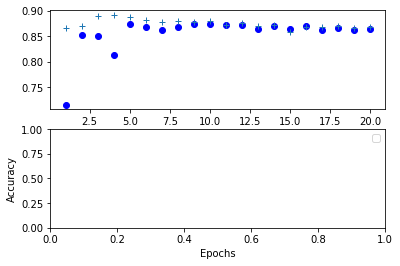

In [28]:
import matplotlib.pyplot as plt

small_acc = histories[0].history['val_acc'] # smaller model
original_acc = histories[1].history['val_acc'] # original model
BIG_acc = histories[2].history['val_acc'] # Bigger model


epochs = range(1, len(small_acc) + 1)
fig, axs = plt.subplots(2, 1)

axs[0].plot(epochs, small_acc, 'bo', label = "Smaller model")
axs[0].plot(epochs, original_acc, '+', label = "Original model")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
#fig.tight_layout()
plt.show()



# axs[0].plot(t, s1, t, s2)
# axs[0].set_xlim(0, 2)
# axs[0].set_xlabel('time')
# axs[0].set_ylabel('s1 and s2')
# axs[0].grid(True)

# cxy, f = axs[1].cohere(s1, s2, 256, 1. / dt)
# axs[1].set_ylabel('coherence')

# fig.tight_layout()
plt.show()